<a href="https://colab.research.google.com/github/partha1189/ml/blob/master/MultiLayer_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

print(tf.__version__)

2.3.0


In [3]:
dataset, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXT85QV/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXT85QV/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXT85QV/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
tokenizer = info.features['text'].encoder

In [5]:
tokenizer

<SubwordTextEncoder vocab_size=8185>

In [6]:
tokenizer.vocab_size

8185

In [8]:
tokenizer.subwords[:10]

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br']

In [13]:
train_dataset.output_shapes

Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


(TensorShape([None]), TensorShape([]))

In [14]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE,tf.compat.v1.data.get_output_shapes(test_dataset) )

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')                         
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 110s 281ms/step - loss: 0.5931 - accuracy: 0.6786 - val_loss: 0.5204 - val_accuracy: 0.7878
Epoch 2/10
391/391 [==============================] - 110s 283ms/step - loss: 0.5294 - accuracy: 0.7437 - val_loss: 0.4883 - val_accuracy: 0.7861
Epoch 3/10
391/391 [==============================] - 111s 283ms/step - loss: 0.3367 - accuracy: 0.8572 - val_loss: 0.3501 - val_accuracy: 0.8574
Epoch 4/10
391/391 [==============================] - 111s 283ms/step - loss: 0.2323 - accuracy: 0.9126 - val_loss: 0.3309 - val_accuracy: 0.8630
Epoch 5/10
391/391 [==============================] - 111s 284ms/step - loss: 0.1828 - accuracy: 0.9340 - val_loss: 0.3459 - val_accuracy: 0.8648
Epoch 6/10
391/391 [==============================] - 111s 284ms/step - loss: 0.1496 - accuracy: 0.9493 - val_loss: 0.3677 - val_accuracy: 0.8695
Epoch 7/10
391/391 [==============================] - 111s 285ms/step - loss: 0.1073 - accuracy: 0.9659 - val_loss: 0.4587 -

In [22]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

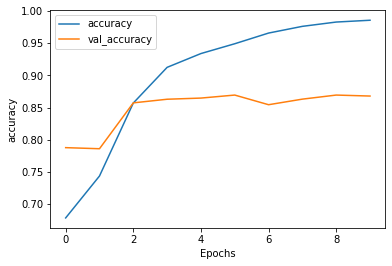

In [23]:
plot_graphs(history, 'accuracy')

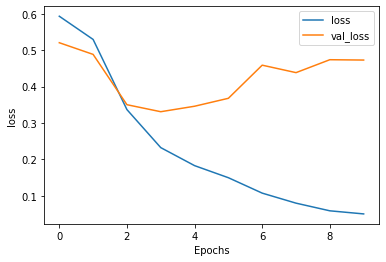

In [24]:
plot_graphs(history, 'loss')